# **Домашняя работа #1** 

---

### **Выполнил**:  
**Вольхин Данил Федорович**

### **Email**:  
[dfvolkhin@edu.hse.ru](mailto:dfvolkhin@edu.hse.ru)

### **Дата**:  
**23 сентября 2024**

---

[Описание задания](TASK1.html)

😊 Первый раз запускаем джупитер и пандас 😊

 # Библиотеки


In [3]:
"""

%load_ext autoreload загрузка расширения autoreload
%autoreload 2 режим перезагрузки второго уровня

Как я понял эти волшебные функции позволяют использовать скрипты без повторного импортирования,
из-за чего скрипты перезагружаются на лету, полезно, когда лень делать импорты
(Будет медленее)

"""

%load_ext autoreload
%autoreload 2

In [4]:
"""

Базовые библиотеки

"""

import os # Пути
import pandas as pd # Для работы с таблицами
import duckdb as db # SQL запросы к таблицам
import numpy as np # Полезная штука
from tqdm import tqdm # Прогресс бар
import copy # Для копирования данных
import ast

import matplotlib.pyplot as plt # Графики
import seaborn as sns # Графики
sns.set_style("darkgrid", {"axes.facecolor": ".9"}) # Стиль

import warnings
warnings.simplefilter('ignore') # Выключаем предупреждения

In [5]:
"""

Импорт скриптов из кастомной библиотеки

"""

from Library.TrendVisualizerFrom90 import TrendVisualizer
from Library.StatisticAnalysisFrom90 import perform_statistical_analysis
from Library.KeyVsTempo import analyze_tonality_vs_tempo
from Library.ModeVsValence import analyze_mode_vs_valence
from Library.KeyDiversity import analyze_key_diversity
from Library.JointValence import analyze_joint_influence
from Library.InstrumentPrice import train_catboost_model

# Загрузка и просмотр данных

In [6]:
# Просто открываем по пути дату
data = pd.read_csv("./tracks_features.csv")

In [7]:
# Смотрим информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204022 non-null  object 
 2   album             1204014 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [8]:
data.head(10)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.026100,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.012900,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.023400,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.163000,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.001620,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
5,2LXPNLSMAauNJfnC58lSqY,Born of a Broken Man,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],6,1,False,0.298,...,0.0727,0.053800,0.001520,0.2010,0.194,148.282,280960,4.0,1999,1999-11-02
6,3moeHk8eIajvUEzVocXukf,Born As Ghosts,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],7,1,False,0.417,...,0.1750,0.000427,0.000134,0.1070,0.483,90.395,202040,4.0,1999,1999-11-02
7,4llunZfVXv3NvUzXVB3VVL,Maria,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],8,1,False,0.277,...,0.0883,0.006940,0.000054,0.1880,0.618,172.848,228093,4.0,1999,1999-11-02
8,21Mq0NzFoVRvOmLTOnJjng,Voice of the Voiceless,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],9,1,False,0.441,...,0.0440,0.019500,0.006840,0.1500,0.418,83.371,151573,4.0,1999,1999-11-02
9,6s2FgJbnnMwFTpWJZzvb6z,New Millennium Homes,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],10,1,False,0.448,...,0.0676,0.003060,0.000000,0.0987,0.761,92.777,224933,4.0,1999,1999-11-02


In [9]:
# Посмотрим что из себя представлет каждый столбец
data.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

In [10]:
# Количество уникальных элементов в каждом столбце
data.nunique(axis=0)

id                  1204025
name                 850943
album                106161
album_id             118382
artists              165365
artist_ids           166423
track_number             50
disc_number              13
explicit                  2
danceability           1362
energy                 3441
key                      12
loudness              39805
mode                      2
speechiness            1653
acousticness           5398
instrumentalness       5402
liveness               1799
valence                1884
tempo                140472
duration_ms          210013
time_signature            5
year                    101
release_date          10566
dtype: int64

Описание каждого столбца:
* **id** - уникальный идентификатор трека
* **name** - название трека
* **album** - название альбома, которому принадлежит трек
* **album_id** - уникальный идентификатор альбома
* **artists** - список артисов, у каждой песни может быть несколько авторов
* **artists_id** - список уникальных идентификаторов для каждого автора
* **track_number** - порядковый номер трека в альбоме
* **disc_number** - номер диска (для многодисковых альбомов)
* **explicit** - есть ненормативная лексика или нет                                     
* **danceability** - насколько трек танцевальный (от 0 до 1)                            
* **energy** - уровень энергичности трека                                               
* **key** - тональность трека, представлена как целое число 0 = C, 1 = C#               
* **loudness** - громкость трека в децибелах, обычно от -60 до 0 дБ                     
* **mode** - минор (0), мажор (1)                                                       
* **speechiness** - насколько много в треке речи                                        
* **acousticness** - вероятность? того что трек акустический                            
* **instrumentalness** - вероятность? того что трек инструментальный (нет вокала)       
* **liveness** - вероятность? того, что трек записан на живом выступлении               
* **valence** - позитивность трека (0 - совсем грустный, 1 - очень даже веселый)        
* **tempo** - темп трека в ударах в минуту                                              
* **duration** - длительность трека                                                     
* **time signature** - такт в музыке
* **year** - год релиза
* **release date** - точная дата выпуска                                               

# Блок 1

## 1. Можно ли по данным датасета спотифай сказать, что музыкальные композиции с 90х годов стали сложнее или проще?

In [11]:
# Сделаем копию даты, но для годов после 90ых
data_after_90 = copy.deepcopy(data[data['year'] >= 1990])

In [12]:
data_after_90.describe()

,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
count,1.144617e+06,1.144617e+06,1.144617e+06,1.144617e+06,1.144617e+06,1.144617e+06,1.144617e+06,1.144617e+06,1.144617e+06,1.144617e+06,1.144617e+06,1.144617e+06,1.144617e+06,1.144617e+06,1.144617e+06,1.144617e+06
mean,7.660653e+00,1.053932e+00,4.941397e-01,5.136009e-01,5.198438e+00,-1.168343e+01,6.683633e-01,8.528467e-02,4.411898e-01,2.847745e-01,2.006486e-01,4.251370e-01,1.177206e+02,2.487520e+05,3.833053e+00,2.008950e+03
std,6.016222e+00,2.895786e-01,1.900339e-01,2.949862e-01,3.538527e+00,6.994098e+00,4.708014e-01,1.167606e-01,3.853542e-01,3.770540e-01,1.789868e-01,2.693646e-01,3.096576e+01,1.623658e+05,5.614479e-01,7.701460e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,1.990000e+03
25%,3.000000e+00,1.000000e+00,3.570000e-01,2.570000e-01,2.000000e+00,-1.504300e+01,0.000000e+00,3.520000e-02,3.430000e-02,7.450000e-06,9.690000e-02,1.900000e-01,9.409300e+01,1.745000e+05,4.000000e+00,2.004000e+03
50%,7.000000e+00,1.000000e+00,5.020000e-01,5.300000e-01,5.000000e+00,-9.600000e+00,1.000000e+00,4.470000e-02,3.740000e-01,8.490000e-03,1.250000e-01,4.000000e-01,1.168940e+02,2.246400e+05,4.000000e+00,2.009000e+03
75%,1.000000e+01,1.000000e+00,6.340000e-01,7.710000e-01,8.000000e+00,-6.620000e+00,1.000000e+00,7.330000e-02,8.570000e-01,7.240000e-01,2.440000e-01,6.400000e-01,1.372260e+02,2.859200e+05,4.000000e+00,2.016000e+03
max,5.000000e+01,1.300000e+01,1.000000e+00,1.000000e+00,1.100000e+01,7.234000e+00,1.000000e+00,9.690000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.489340e+02,6.061090e+06,5.000000e+00,2.020000e+03


In [13]:
# Проверка на пропуски
for name, value in data_after_90.items():
    pas = value.isnull().sum() if value.isnull().sum() != 0 else None
    if pas:
        print(f"Количество пропусков в столбце {name}: {pas}")

Количество пропусков в столбце name: 3
Количество пропусков в столбце album: 11


In [14]:
# Проверим на всякий случай, что данные с 90 ых годов
min_year, max_year = data_after_90['year'].min(), data_after_90['year'].max()
print(f"Диапазон по годам: с {min_year} по {max_year}")

Диапазон по годам: с 1990 по 2020


Чтобы определить сложность песни, нужно выбрать по каким параметрам мы
мы будем оценивать эту сложность, я выбрал эти столбцы:
* tempo
* duration_ms
* instrumentalness
* danceability
* energy
* acousicness
* liveness

In [15]:
# Среднее по столбцам
metrics = data_after_90.groupby('year').agg({
        'tempo': 'mean',
        'duration_ms': 'mean',
        'instrumentalness': 'mean',
        'danceability': 'mean',
        'energy': 'mean',
        'acousticness': 'mean',
        'liveness': 'mean'
    }).reset_index()
print(metrics)

    year       tempo    duration_ms  instrumentalness  danceability    energy  \
0   1990  113.446046  261344.896418          0.352287      0.448802  0.359711   
1   1991  113.241539  259030.587709          0.327937      0.452272  0.350161   
2   1992  114.046438  257289.707750          0.326159      0.452555  0.394444   
3   1993  114.306527  256623.062267          0.325326      0.466698  0.387304   
4   1994  114.459022  259271.494126          0.337464      0.445240  0.386651   
5   1995  113.867774  242629.290234          0.334616      0.447920  0.379824   
6   1996  115.961868  251743.696244          0.301353      0.471078  0.431406   
7   1997  114.908741  252383.444955          0.289092      0.479017  0.412524   
8   1998  115.469966  251807.787608          0.306565      0.476113  0.437538   
9   1999  114.551176  253553.844742          0.317108      0.467164  0.446497   
10  2000  114.604785  251298.159804          0.309568      0.467394  0.434309   
11  2001  116.478597  251621

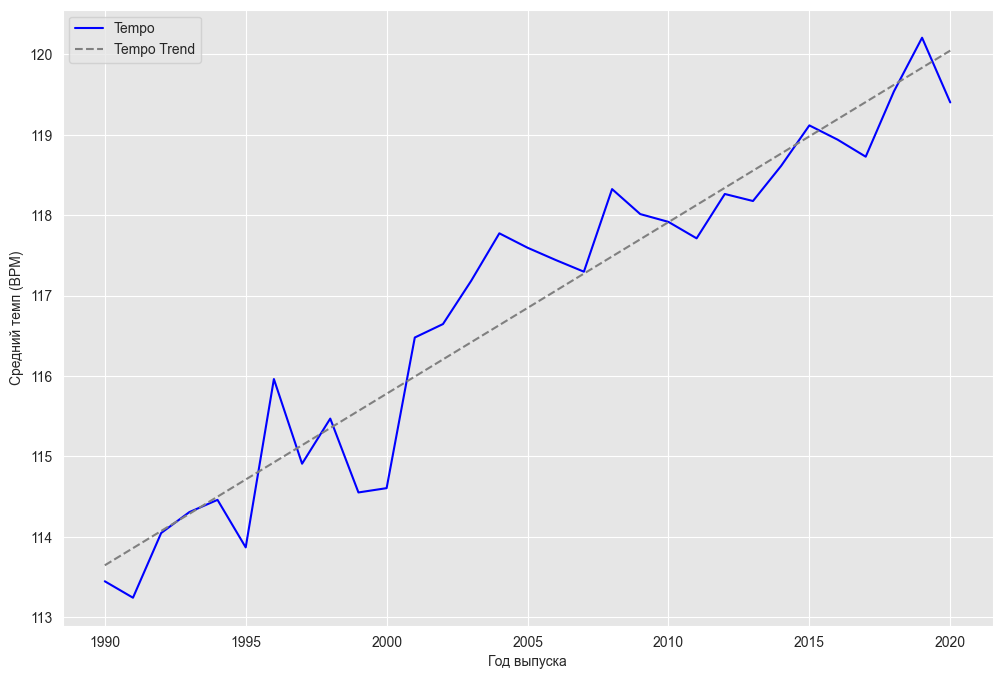

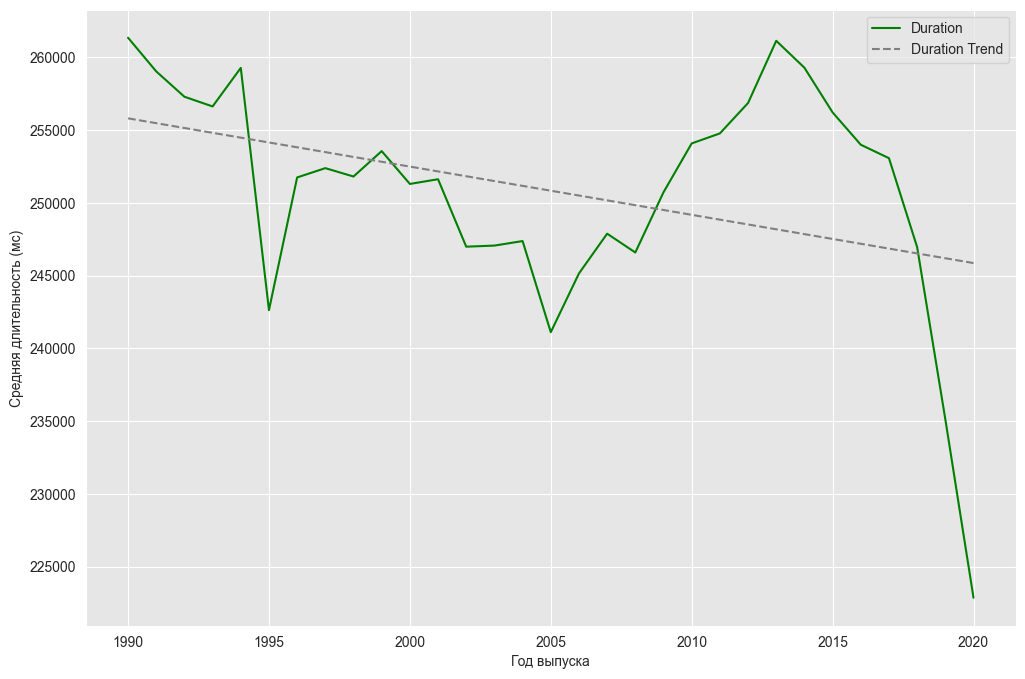

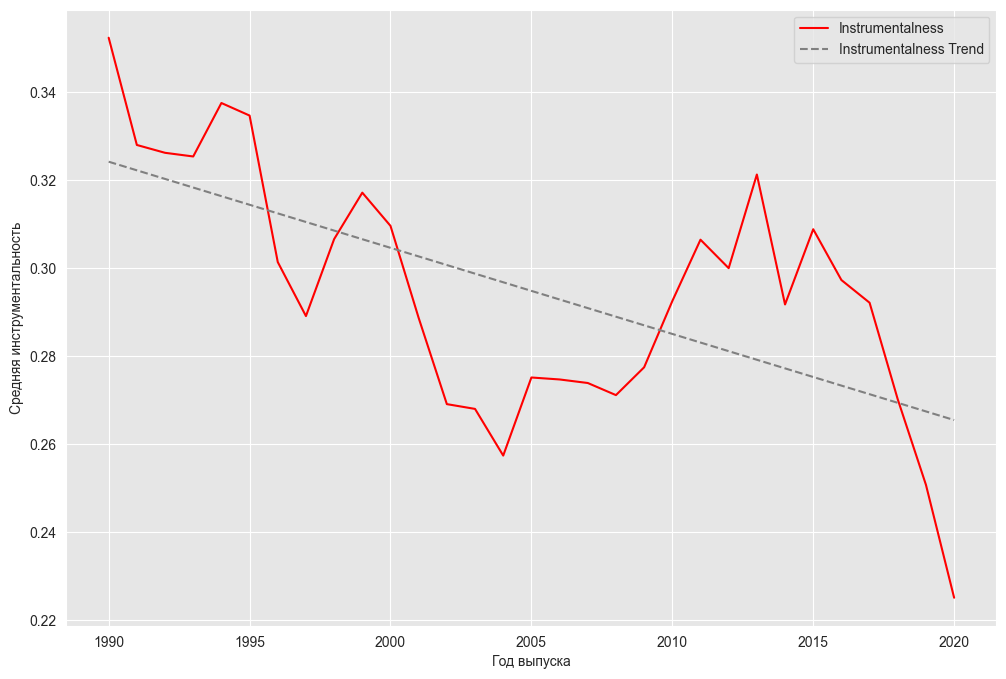

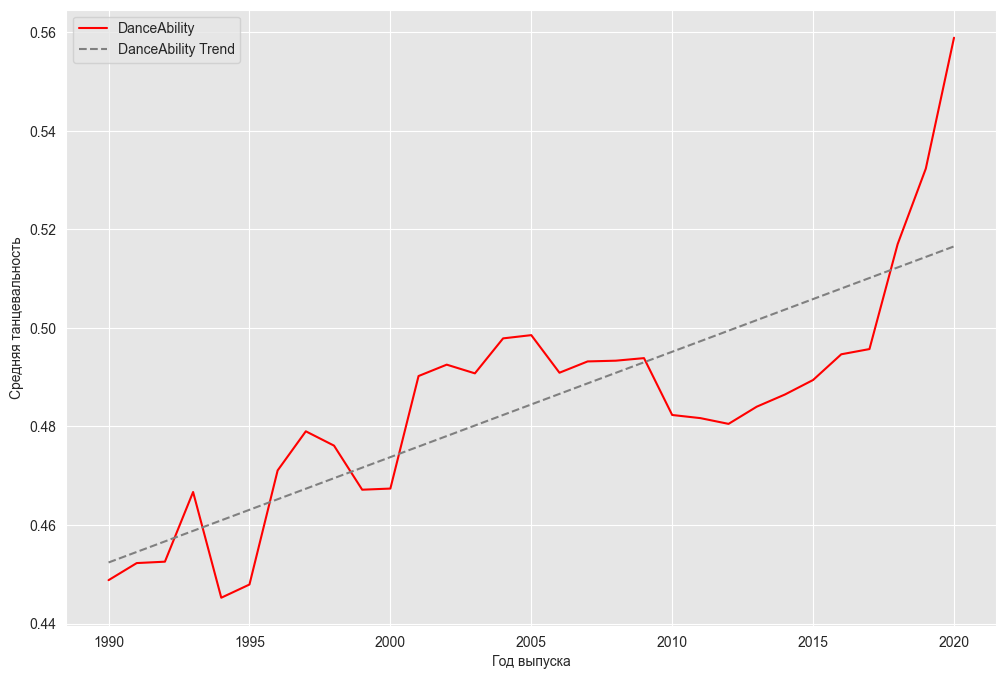

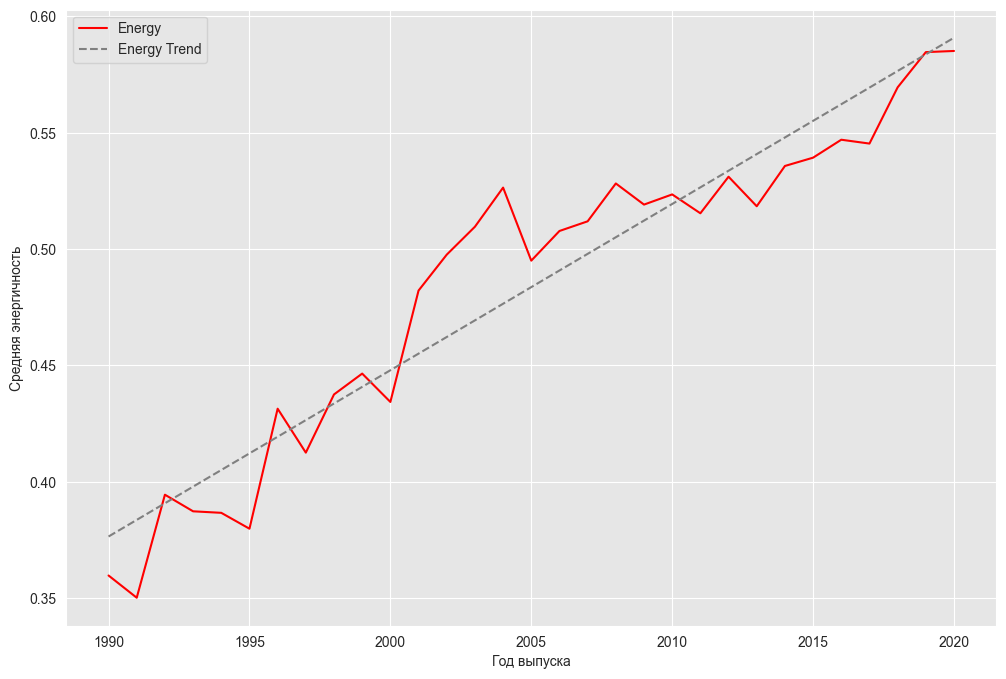

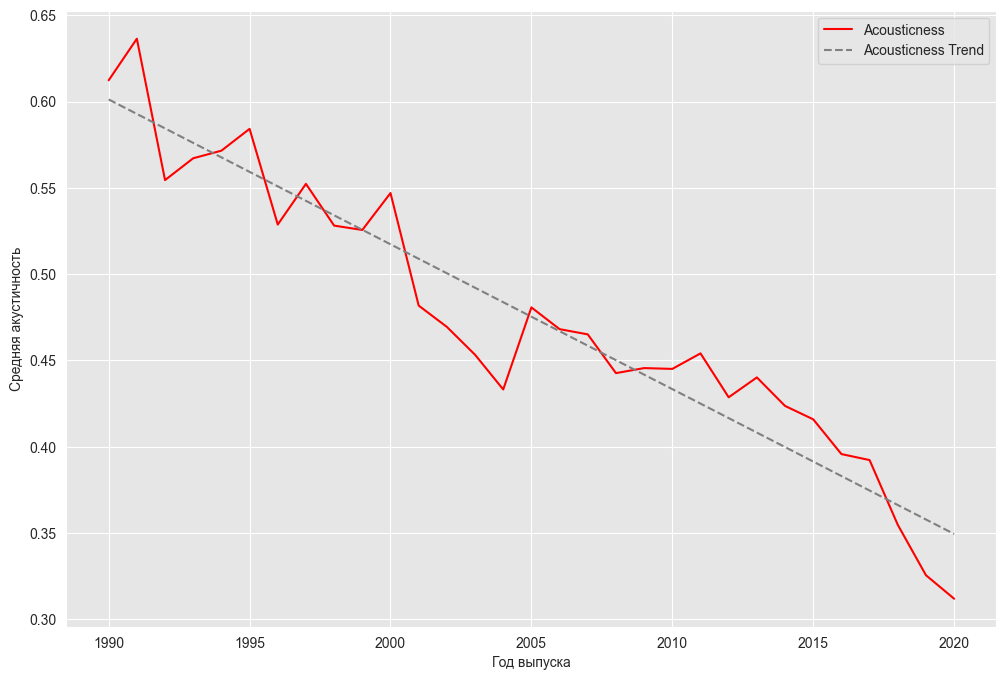

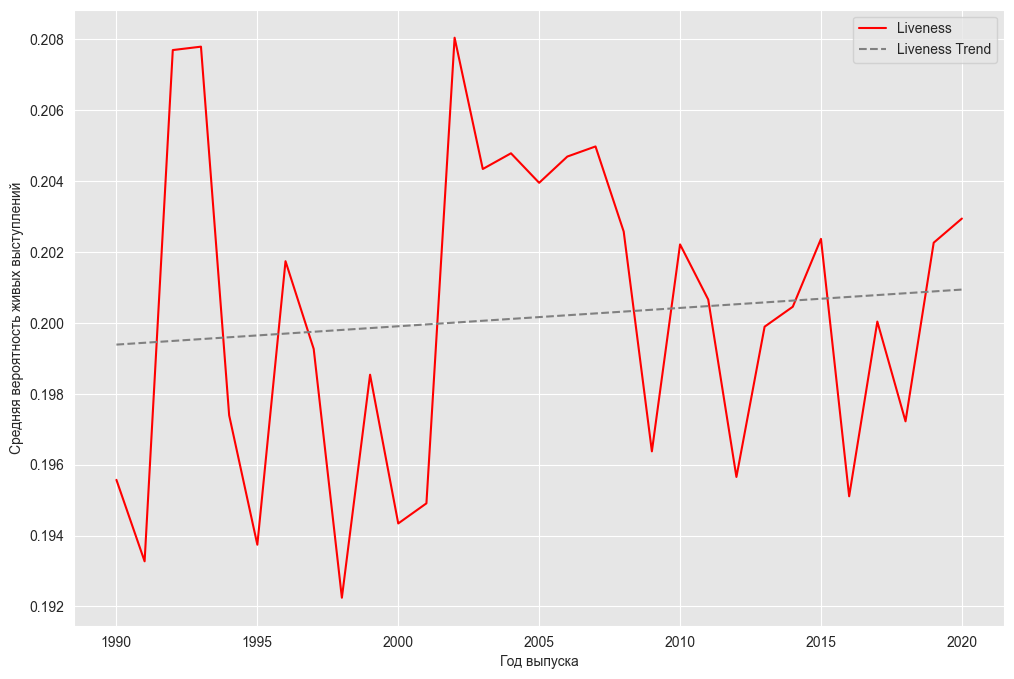

In [16]:
# Построим графики с трендами для метрик
visualizer = TrendVisualizer(metrics)
visualizer.visualize_tempo()
visualizer.visualize_duration()
visualizer.visualize_instrumentalness()
visualizer.visualize_danceability()
visualizer.visualize_energy()
visualizer.visualize_acousticness()
visualizer.visualize_liveness()

In [17]:
# t статистика
perform_statistical_analysis(data_after_90)

Бутстрэп: Разность для tempo: -3.5701698696063175, p-значение: 1.0
Бутстрэп: Разность для duration_ms: 5329.098522312881, p-значение: 0.0
Бутстрэп: Разность для instrumentalness: 0.037731093950524985, p-значение: 0.0
Бутстрэп: Разность для danceability: -0.03532463169765071, p-значение: 1.0
Бутстрэп: Разность для energy: -0.12090212892235624, p-значение: 1.0
Бутстрэп: Разность для acousticness: 0.13234740009126056, p-значение: 0.0
Бутстрэп: Разность для liveness: -0.002708556745174978, p-значение: 1.0


---
## Можно ли по данным датасета спотифай сказать, что музыкальные композиции с 90х годов стали сложнее или проще?
## Да, стали проще
---
#### По данным трендов и статистических тестов, можно сделать вывод, что музыкальные композиции с 90-х годов стали проще. Это проявляется в ряде признаков:

 * #### Повышение темпа, танцевальности и энергичности — часто такие треки характеризуются более простой ритмической структурой.
 * #### Уменьшение длительности композиций — короткие треки обычно имеют более простую структуру и легче воспринимаются.
 * #### Снижение акустичности и инструментальности — уменьшение использования живых инструментов и переход к электронным звукам может указывать на упрощение процесса создания музыки.
 * #### Тренды показывают, что музыка становится более ориентированной на ритм, скорость и танцевальность, в ущерб более сложным музыкальным структурам.

## В общем тренд на коммерциализацию и ориентирование на массовость. Все стремится к минимализму (логотипы, например). Попробуйте заставить послушать современных кунов и тянок - Queen, у которых богемская рапсодия по длительности около 6 минут)
😊
---

## 2. Коррелирует ли характер тональности с темпом?

In [18]:
# Поробуем, а вдруг сработает
analyze_tonality_vs_tempo(data_after_90)

Корреляция между тональностью (key) и темпом (tempo): 0.006232356091400826, p-значение: 2.5957036471997957e-11
Корреляция между тональностью/модальностью (mode) и темпом (tempo): 0.014380170627520528, p-значение: 2.0428462946735601e-53
                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     160.5
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.97e-70
Time:                        05:28:16   Log-Likelihood:            -5.5533e+06
No. Observations:             1144617   AIC:                         1.111e+07
Df Residuals:                 1144614   BIC:                         1.111e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                

---

## Коррелирует ли характер тональности с темпом?
## Да

---

#### Результаты модели подтверждают, что характер тональности коррелирует с темпом:
* #### Более высокие значения тональности (key) в целом ассоциируются с немного более высокими темпами.
* #### Мажорные тональности (mode = 1) связаны с значительно более высокими темпами по сравнению с минорными тональностями (mode = 0).
* #### Значимость: Обе переменные (key и mode) статистически значимы, что говорит о том, что они действительно влияют на темп.

---

## 3. (valence - Measures how positive a track sounds, from 1 to 0) - как коррелирует с характером (мажор/минор) тональности и коррелирует ли?

Корреляция между модальностью (mode) и валентностью (valence): 0.03800479497979703, p-значение: 0.0


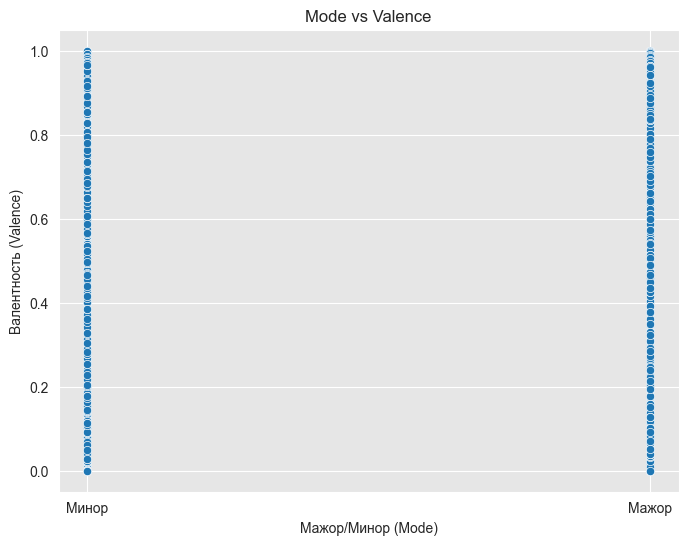

                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1656.
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        05:28:19   Log-Likelihood:            -1.2193e+05
No. Observations:             1144617   AIC:                         2.439e+05
Df Residuals:                 1144615   BIC:                         2.439e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4106      0.000    939.848      0.0

In [19]:
# Очередной раз молимся на запуск кода
analyze_mode_vs_valence(data_after_90)

---

## (valence - Measures how positive a track sounds, from 1 to 0) - как коррелирует с характером (мажор/минор) тональности и коррелирует ли?
## Да, коррелирует

---

#### Результаты модели подтверждают, что характер тональности (мажор/минор) коррелирует с валентностью:
* #### Мажорные треки, как ожидается, имеют более высокую валентность, чем минорные. Это соответствует интуитивному пониманию, что мажорная музыка обычно воспринимается как более позитивная и радостная.
* #### Значимость: Обе переменные (mode и valence) статистически значимы, что говорит о том, что мажорные и минорные тональности действительно влияют на восприятие трека.

---

## 4. Можно ли сказать, что за последнее время ключи тональностей (key) стали менее/более разнообразными

Уникальные ключи: Среднее = 12.0, Доверительный интервал = [12.0, 12.0]
Симпсонов индекс: Среднее = 0.904922389707415, Доверительный интервал = [0.9043292522512327, 0.9055999749911344]


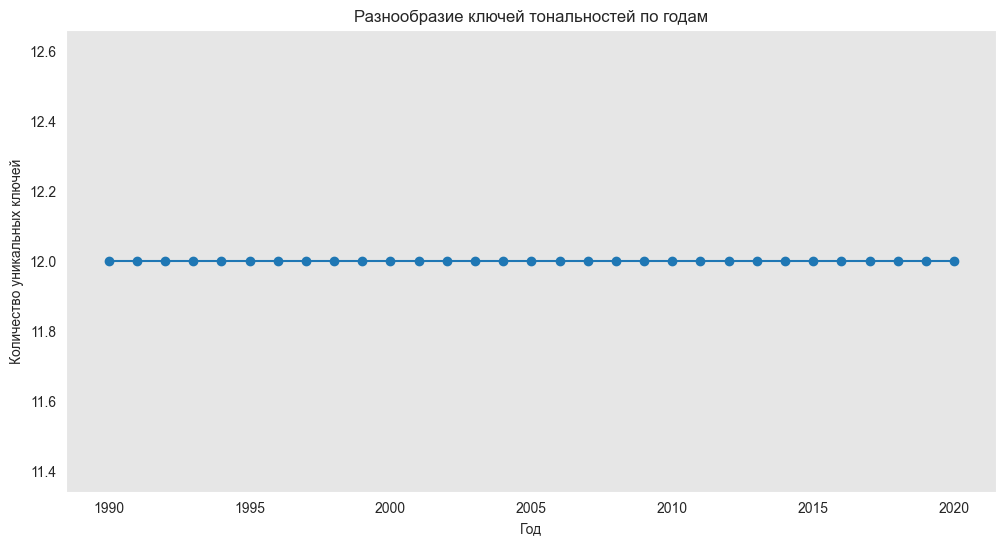

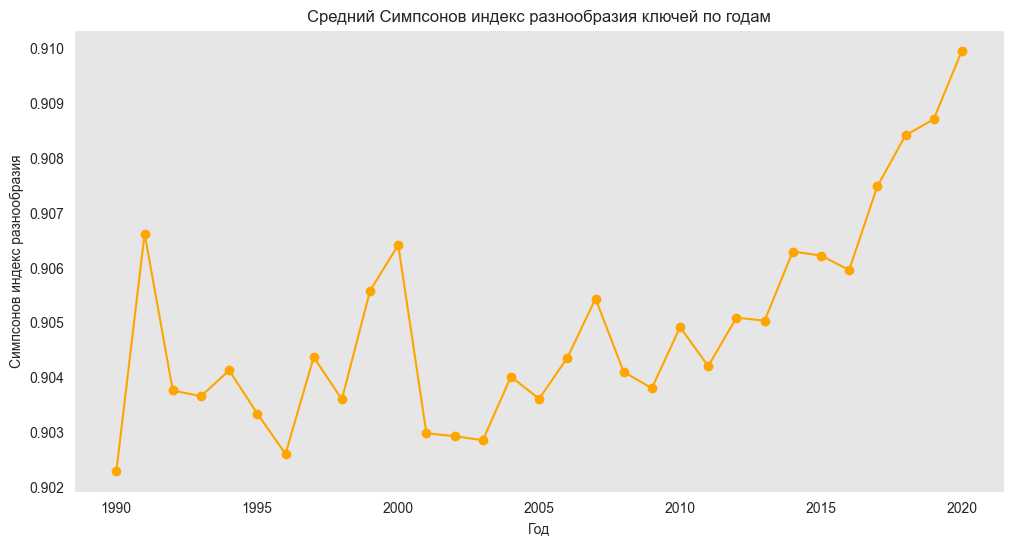

In [20]:
# Еще разок
analyze_key_diversity(data_after_90)

---

## 4. Можно ли сказать, что за последнее время ключи тональностей (key) стали менее/более разнообразными?
##  Если рассматривать промежуток между 90 и 20 годами, то музыка не стала более или менее разнообразной.

---

#### Стабильность: Разнообразие ключей тональностей остается стабильным и высокоразнообразным в рассматриваемом периоде. Это может говорить о том, что музыкальная сцена не стала более однообразной и продолжает использовать разнообразные ключи.
#### Никаких значительных изменений: Учитывая узкие доверительные интервалы и стабильные средние значения, можно предположить, что за исследуемый период не наблюдается значительных изменений в разнообразии тональностей в музыке.

---

## 5. Какое совместное влияние оказывают факторы tempo, mode и loudness на показатель valence?

In [21]:
# Пум-пум
analyze_joint_influence(data_after_90)

                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                 7.077e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        05:28:21   Log-Likelihood:                -25373.
No. Observations:             1144617   AIC:                         5.075e+04
Df Residuals:                 1144613   BIC:                         5.080e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4251      0.000   1838.519      0.0

---

## 5. Какое совместное влияние оказывают факторы tempo, mode и loudness на показатель valence?
## Все три фактора положительно влияют на valence

---

* #### Все три фактора (tempo, mode, loudness) оказывают положительное и статистически значимое влияние на валентность.
* #### Tempo имеет наибольшее влияние среди этих факторов, следуя за ним loudness и mode.
* #### Поскольку модель объясняет только 15.6% вариации валентности, стоит рассмотреть возможность добавления других факторов.

---

# Загрузка и просмотр данных

In [52]:
# Просто открываем по пути дату
data = pd.read_csv("./music_instruments.csv")

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31920 entries, 0 to 31919
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        31920 non-null  object
 1   description  31920 non-null  object
 2   text         31920 non-null  object
 3   param_dict   31920 non-null  object
 4   price        31920 non-null  object
 5   listing_id   31920 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


In [54]:
data.head(10)

,title,description,text,param_dict,price,listing_id
0,Fender American Standard Stratocaster [XIX19] ...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,"$1,131.92",cbbfd652-ca5f-11ed-8644-acde48001122
1,"Fender ""American Vintage II 1951 Telecaster"" 3...",The Fender® American Vintage II series present...,The Fender® American Vintage II series present...,{'Condition': 'Brand New (New)Brand New items ...,"$1,935.55",cd998c16-ca5f-11ed-8644-acde48001122
2,Rebel Custom Guitars Funky Claude 2022 - Hydro...,Stratocaster Style Custom Guitar by Rebel Cust...,Stratocaster Style Custom Guitar by Rebel Cust...,{'Condition': 'Brand New (New)Brand New items ...,"$1,055.53",cfe6936a-ca5f-11ed-8644-acde48001122
3,Fender AMERICAN PROFESSIONAL Stratocaster [MJ8...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,"$1,290.62",d1e90396-ca5f-11ed-8644-acde48001122
4,G&L S-500 Premium C.F.S [MJ724] | Reverb,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,$575.55,d3f30786-ca5f-11ed-8644-acde48001122
5,Kramer by ESP LK-1BRF Reverse Headstock 1980s ...,Here we have what looks like a Kramer LK-1BRF ...,Here we have what looks like a Kramer LK-1BRF ...,{'Condition': 'Good (Used)Good condition items...,$551.57,d62ad5a6-ca5f-11ed-8644-acde48001122
6,Fender Kurt Cobain Signature Mustang Lake Plac...,Here for sale we have Fender Kurt Cobain Signa...,Here for sale we have Fender Kurt Cobain Signa...,{'Condition': 'Good (Used)Good condition items...,"$2,185.94",d81c1078-ca5f-11ed-8644-acde48001122
7,Gibson Custom Shop M2M ES-335 '64 Reissue - Mu...,Custom ShopModel: Custom Shop Murphy Lab 1964 ...,Custom ShopModel: Custom Shop Murphy Lab 1964 ...,{'Condition': 'Brand New (New)Brand New items ...,"$9,407.69",da00361c-ca5f-11ed-8644-acde48001122
8,MyDream Partcaster Custom Built - Freaky Funky...,Fender Stratocaster type guitar assembled in ...,Fender Stratocaster type guitar assembled in ...,{'Condition': 'Brand New (New)Brand New items ...,"$1,013.32",dc2dfdfc-ca5f-11ed-8644-acde48001122
9,Lung guitar Nutone 2021 custom | Reverb,Hey! got a cool new sibling in our Lung guitar...,Hey! got a cool new sibling in our Lung guitar...,{'Condition': 'Brand New (New)Brand New items ...,"$2,675.61",de49708a-ca5f-11ed-8644-acde48001122


In [55]:
def convert_price_to_float(df, column_name):
    df[column_name] = df[column_name].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [56]:
# Преобразуем строки в словари
data['param_dict'] = data['param_dict'].apply(ast.literal_eval)
# Раскроем словари в отдельные столбцы
data_dir = data['param_dict'].apply(pd.Series)
data = pd.concat([data_dir, data], axis=1)
data.drop(['param_dict'], axis=1, inplace=True)
# Преобразование столбца price
convert_price_to_float(data, 'price')

In [57]:
data.head(10)

,Condition,Brand,Model,Categories,Year,Fretboard Material,Pickup Configuration,Color Family,Right / Left Handed,Body Shape,...,Artist,Frets,Top Material,Finish Features,Model Sub-Family,title,description,text,price,listing_id
0,Very Good (Used)Very Good items may show a few...,Fender,American Standard Stratocaster with Rosewood F...,Solid Body,2008,Rosewood,SSS,White,Right Handed,S-Style,...,NaN,NaN,NaN,NaN,NaN,Fender American Standard Stratocaster [XIX19] ...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,1131.92,cbbfd652-ca5f-11ed-8644-acde48001122
1,Brand New (New)Brand New items are sold by an ...,Fender,"""American Vintage II 1951 Telecaster"" HARDCASE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Fender ""American Vintage II 1951 Telecaster"" 3...",The Fender® American Vintage II series present...,The Fender® American Vintage II series present...,1935.55,cd998c16-ca5f-11ed-8644-acde48001122
2,Brand New (New)Brand New items are sold by an ...,Rebel Custom Guitars,Funky Claude,Solid Body,2022,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Rebel Custom Guitars Funky Claude 2022 - Hydro...,Stratocaster Style Custom Guitar by Rebel Cust...,Stratocaster Style Custom Guitar by Rebel Cust...,1055.53,cfe6936a-ca5f-11ed-8644-acde48001122
3,Very Good (Used)Very Good items may show a few...,Fender,American Professional Stratocaster with Rosewo...,Solid Body,2017,Rosewood,SSS,Red,Right Handed,S-Style,...,NaN,NaN,NaN,NaN,NaN,Fender AMERICAN PROFESSIONAL Stratocaster [MJ8...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,1290.62,d1e90396-ca5f-11ed-8644-acde48001122
4,Very Good (Used)Very Good items may show a few...,G&L,S-500 Premium C.F.S [MJ724],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,G&L S-500 Premium C.F.S [MJ724] | Reverb,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,575.55,d3f30786-ca5f-11ed-8644-acde48001122
5,Good (Used)Good condition items function prope...,Kramer,LK-1BRF,Solid Body,1980s,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Kramer by ESP LK-1BRF Reverse Headstock 1980s ...,Here we have what looks like a Kramer LK-1BRF ...,Here we have what looks like a Kramer LK-1BRF ...,551.57,d62ad5a6-ca5f-11ed-8644-acde48001122
6,Good (Used)Good condition items function prope...,Fender,Kurt Cobain Mustang,Solid Body,2012,Rosewood,HS,Blue,Right Handed,Double Cutaway,...,Kurt Cobain,NaN,NaN,NaN,NaN,Fender Kurt Cobain Signature Mustang Lake Plac...,Here for sale we have Fender Kurt Cobain Signa...,Here for sale we have Fender Kurt Cobain Signa...,2185.94,d81c1078-ca5f-11ed-8644-acde48001122
7,Brand New (New)Brand New items are sold by an ...,Gibson,Custom Shop M2M ES-335 '64 Reissue - Murphy La...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Gibson Custom Shop M2M ES-335 '64 Reissue - Mu...,Custom ShopModel: Custom Shop Murphy Lab 1964 ...,Custom ShopModel: Custom Shop Murphy Lab 1964 ...,9407.69,da00361c-ca5f-11ed-8644-acde48001122
8,Brand New (New)Brand New items are sold by an ...,MyDream,Stratocaster,Solid Body,2022,Maple,SSS,NaN,Right Handed,S-Style,...,NaN,Medium Jumbo,NaN,NaN,NaN,MyDream Partcaster Custom Built - Freaky Funky...,Fender Stratocaster type guitar assembled in ...,Fender Stratocaster type guitar assembled in ...,1013.32,dc2dfdfc-ca5f-11ed-8644-acde48001122
9,Brand New (New)Brand New items are sold by an ...,Lung guitar,Nutone,NaN,2021,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Lung guitar Nutone 2021 custom | Reverb,Hey! got a cool new sibling in our Lung guitar...,Hey! got a cool new sibling in our Lung guitar...,2675.61,de49708a-ca5f-11ed-8644-acde48001122


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31920 entries, 0 to 31919
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Condition              31920 non-null  object 
 1   Brand                  31920 non-null  object 
 2   Model                  31920 non-null  object 
 3   Categories             23991 non-null  object 
 4   Year                   19030 non-null  object 
 5   Fretboard Material     11901 non-null  object 
 6   Pickup Configuration   11348 non-null  object 
 7   Color Family           7524 non-null   object 
 8   Right / Left Handed    18929 non-null  object 
 9   Body Shape             16140 non-null  object 
 10  Number of Strings      15118 non-null  object 
 11  Fretboard Radius       5214 non-null   object 
 12  Neck Material          10870 non-null  object 
 13  Offset Body            8388 non-null   object 
 14  Finish Style           8831 non-null   object 
 15  Bo

In [59]:
# Посмотрим что из себя представлет каждый столбец
data.columns

Index(['Condition', 'Brand', 'Model', 'Categories', 'Year',
       'Fretboard Material', 'Pickup Configuration', 'Color Family',
       'Right / Left Handed', 'Body Shape', 'Number of Strings',
       'Fretboard Radius', 'Neck Material', 'Offset Body', 'Finish Style',
       'Body Type', 'Body Material', 'Series', 'Bridge/Tailpiece Type',
       'Wood Top Style', 'Nut Width', 'Model Family', 'Scale Length',
       'Neck Construction', 'Number of Frets', 'Made In', 'Finish',
       'Product Family', 'Artist', 'Frets', 'Top Material', 'Finish Features',
       'Model Sub-Family', 'title', 'description', 'text', 'price',
       'listing_id'],
      dtype='object')

In [60]:
# Количество уникальных элементов в каждом столбце
data.nunique(axis=0)

Condition                    9
Brand                     1442
Model                    11755
Categories                  51
Year                       890
Fretboard Material          19
Pickup Configuration        12
Color Family                52
Right / Left Handed          2
Body Shape                   7
Number of Strings            9
Fretboard Radius            13
Neck Material               16
Offset Body                  2
Finish Style                 3
Body Type                    3
Body Material               22
Series                     145
Bridge/Tailpiece Type        8
Wood Top Style               8
Nut Width                   15
Model Family               173
Scale Length                12
Neck Construction            3
Number of Frets              7
Made In                     54
Finish                    4126
Product Family              29
Artist                     132
Frets                        3
Top Material                 3
Finish Features              4
Model Su

Описание каждого столбца:
Че то таблица большая получилась, в целом столбцы более или менее понятные :)
                                            

In [61]:
# Проверка на пропуски
for name, value in data.items():
    pas = value.isnull().sum() if value.isnull().sum() != 0 else None
    if pas:
        print(f"Количество пропусков в столбце {name}: {pas}")

Количество пропусков в столбце Categories: 7929
Количество пропусков в столбце Year: 12890
Количество пропусков в столбце Fretboard Material: 20019
Количество пропусков в столбце Pickup Configuration: 20572
Количество пропусков в столбце Color Family: 24396
Количество пропусков в столбце Right / Left Handed: 12991
Количество пропусков в столбце Body Shape: 15780
Количество пропусков в столбце Number of Strings: 16802
Количество пропусков в столбце Fretboard Radius: 26706
Количество пропусков в столбце Neck Material: 21050
Количество пропусков в столбце Offset Body: 23532
Количество пропусков в столбце Finish Style: 23089
Количество пропусков в столбце Body Type: 16729
Количество пропусков в столбце Body Material: 21951
Количество пропусков в столбце Series: 25951
Количество пропусков в столбце Bridge/Tailpiece Type: 21829
Количество пропусков в столбце Wood Top Style: 25697
Количество пропусков в столбце Nut Width: 27982
Количество пропусков в столбце Model Family: 23964
Количество про

# Блок 2

## 1. Какие факторы влияют на цену инструмента и как?

In [63]:
importance = train_catboost_model(data, 'price')

MSE: 17895174.12874923, R²: -0.3782400281482794


In [64]:
print(importance)

                  Feature  Importance
1                   Brand   16.062940
0               Condition   15.052218
4                    Year    9.812299
26                 Finish    7.335300
2                   Model    7.288802
3              Categories    6.406502
25                Made In    6.156071
17                 Series    4.719387
8     Right / Left Handed    3.815939
10      Number of Strings    2.589847
7            Color Family    2.472907
21           Model Family    1.582421
31        Finish Features    1.386869
18  Bridge/Tailpiece Type    1.302823
32       Model Sub-Family    1.108227
11       Fretboard Radius    1.106948
16          Body Material    1.055585
20              Nut Width    1.025392
19         Wood Top Style    0.988353
24        Number of Frets    0.972536
9              Body Shape    0.947952
14           Finish Style    0.902015
15              Body Type    0.748784
12          Neck Material    0.721232
22           Scale Length    0.708827
5      Fretb

---

## Какие факторы влияют на цену инструмента и как?
## Бренд, состояние, год

---

#### 1. Марка (Brand) Важность: 16.06% Влияние: Определяет репутацию и качество инструмента. Известные бренды, как правило, имеют более высокие цены из-за своей популярности и доверия покупателей.
#### 2. Состояние (Condition) Важность: 15.05% Влияние: Инструменты в хорошем состоянии стоят дороже. Состояние влияет на функциональность и долговечность.
#### 3. Год (Year) Важность: 9.81% Влияние: Более новые модели могут иметь современные технологии и улучшенные характеристики, что отражается на цене. Однако некоторые старые модели могут быть высоко ценимыми у коллекционеров.

---


## 2. Можно ли разделить объявления на какие-то явно разделяющиеся по некоторому принципу категории: винтаж/ширпотреб/мастеровое и тд

In [65]:
# Пример фильтрации по ключевым словам для каждой категории
vintage_keywords = ['vintage', 'classic', 'old']
mass_production_keywords = ['standard', 'mass production', 'budget']
custom_keywords = ['custom', 'handmade', 'artisan']

# Функция для определения категории
def categorize_instrument(row):
    if any(keyword in row['Model'].lower() for keyword in vintage_keywords):
        return 'Винтаж'
    elif any(keyword in row['Model'].lower() for keyword in mass_production_keywords):
        return 'Ширпотреб'
    elif any(keyword in row['Model'].lower() for keyword in custom_keywords):
        return 'Мастеровые'
    else:
        return 'Другие'

# Применение функции к DataFrame
data['Category'] = data.apply(categorize_instrument, axis=1)

# Посмотрим на распределение категорий
category_distribution = data['Category'].value_counts()
print(category_distribution)

Category
Другие        25030
Мастеровые     2840
Ширпотреб      2195
Винтаж         1855
Name: count, dtype: int64


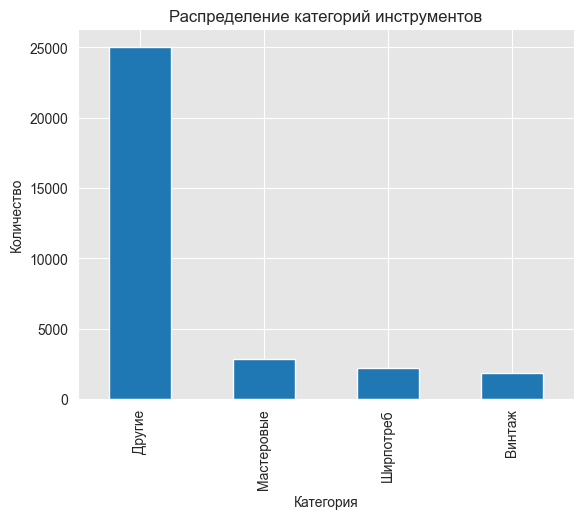

In [66]:
import matplotlib.pyplot as plt

category_distribution.plot(kind='bar')
plt.title('Распределение категорий инструментов')
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.show()

---

## 2. Можно ли разделить объявления на какие-то явно разделяющиеся по некоторому принципу категории: винтаж/ширпотреб/мастеровое и тд
## Кажется да, прослеживается четкое разделение на мастеровые, широпотреб и винтаж, однако значительное количество инструментов попадает в категорию "Другие". Это может указывать на разнообразие в данных, где не все объявления явно подходят под указанные категории.

---